# Data Science Repository Trends on GitHub: An Insightful EDA

### Project Break - EDA
Autor: Lucas Perez Barone

-------

## Objetivo:

rellenar

------

### Índice.

1. Previsualización del DataFrame y datos;

2. Limpieza y preparación de los datos para análisis;

3. Análisis y visualización;

4. Análisis finales y conclusiones.

--------

## 1. Previsualización del DataFrame y datos

In [1]:
# Importación de bibliotecas estándar

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Activación de un entorno virtual optimizado con aceleración por GPU.

import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(f"Dispositivo encontrado: {gpu}")

Dispositivo encontrado: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Importación de funciones auxiliares definidas por el usuario.

import sys
sys.path.append('./src/utils')  

from user_functions import *

In [4]:
# Cargando dataframe con todos los datos obtenidos a través de la API REST de GitHub desde 2010 hasta el 12 de diciembre de 2024.

df_2010_2024 = pd.read_json('./src/data/repositories_2010_to_2014.json')

In [5]:
# Mirando la pinta que tiene las columnas

df_2010_2024.sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,license,score
35831,631074990,Sales-Analysis,AnastasiaML/Sales-Analysis,"{'login': 'AnastasiaML', 'id': 37047286, 'node...",1,0,1,0,"[data-analysis, data-cleaning, data-exploratio...",2023-04-21 21:35:53+00:00,Jupyter Notebook,True,True,True,False,True,None,1
33268,595625357,CustomVector,frhd143/CustomVector,"{'login': 'frhd143', 'id': 34188200, 'node_id'...",2,0,2,0,"[arrays, cpp, data-science, data-structures, v...",2023-01-31 13:30:54+00:00,C++,True,True,True,False,True,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",1
4681,136940402,plumberModel,beeva-jorgezaldivar/plumberModel,"{'login': 'beeva-jorgezaldivar', 'id': 3448239...",4,2,4,0,"[api, caret, data-science, deployment, machine...",2018-06-11 14:47:45+00:00,R,True,True,True,False,True,None,1


In [6]:
# Mirando dtype de cada columna y número de valores nulos

df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48774 entries, 0 to 48773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 48774 non-null  int64              
 1   name               48774 non-null  object             
 2   full_name          48774 non-null  object             
 3   owner              48774 non-null  object             
 4   stargazers_count   48774 non-null  int64              
 5   forks_count        48774 non-null  int64              
 6   watchers_count     48774 non-null  int64              
 7   open_issues_count  48774 non-null  int64              
 8   topics             48774 non-null  object             
 9   created_at         48774 non-null  datetime64[ns, UTC]
 10  language           43891 non-null  object             
 11  has_issues         48774 non-null  bool               
 12  has_projects       48774 non-null  bool       

In [7]:
# Observando la incidencia de valores nulos.

df_2010_2024.isnull().sum()

id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

A pesar de la presencia de valores nulos en algunas variables, el dataframe parece tener el tipo de dato (dtype) adecuado para cada una de ellas.

### Resumen del dataframe.

| **Columna**            | **Descripción**                                                                                                  | **dtype** |
|------------------------|------------------------------------------------------------------------------------------------------------------|-----------|
| `id`                   | El identificador único del repositorio.                                                                          |     int64      |
| `name`                 | El nombre del repositorio.                                                                                       |   object (str) |
| `full_name`            | El nombre completo del repositorio, incluyendo el nombre del propietario.                                        |   object (str) |
| `owner`                | Un objeto que contiene información sobre el propietario del repositorio                                          |object (dict)   |
| `stargazers_count`     | El número de estrellas (stars) que el repositorio ha recibido.                                                   |     int64      |
| `forks_count`          | El número de forks (copias) realizadas a partir del repositorio.                                                 |     int64      |
| `watchers_count`       | El número de observadores que están siguiendo las actividades del repositorio.                                   |     int64      |
| `open_issues_count`    | El número de problemas (issues) abiertos en el repositorio.                                                      |    int64       |
| `topics`               | Una lista de temas y palabras clave asociados al repositorio.                                                    |  object (list) |
| `created_at`           | La fecha y hora en que el repositorio fue creado.                                                                | datetime64[ns, UTC]|
| `language`             | El principal lenguaje de programación utilizado en el repositorio.                                               |    object(str)   |
| `has_issues`           | Valor que indica si el repositorio tiene issues (problemas) habilitados.                                         |        bool   |
| `has_projects`         | Valor que indica si el repositorio tiene proyectos habilitados.                                                  |      bool     |
| `has_downloads`        | Valor que indica si el repositorio permite la descarga de archivos.                                              |       bool    |
| `has_discussions`      | Valor que indica si el repositorio tiene discusiones habilitadas.                                                |      bool     |
| `has_wiki`             | Valor que indica si el repositorio tiene una wiki habilitada.                                                    |      bool     |
| `license`              | El tipo de licencia bajo la cual el repositorio está disponible.                                                 |      object (dict)  |
| `score`                | Un valor numérico (0-1) que representa la relevancia de un repositorio en los resultados de una búsqueda.         |     int64    |

In [8]:
# # Observando el aspecto de las variables numéricas int64


df_2010_2024.describe(percentiles=[.25, .50, .75, .95])

,id,stargazers_count,forks_count,watchers_count,open_issues_count,score
count,4.877400e+04,48774.000000,48774.000000,48774.000000,48774.000000,48774.0
mean,4.510644e+08,60.855538,13.664657,60.855538,2.668881,1.0
std,2.330401e+08,973.279404,253.366183,973.279404,47.476363,0.0
min,6.585180e+05,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.565963e+08,0.000000,0.000000,0.000000,0.000000,1.0
50%,4.373096e+08,0.000000,0.000000,0.000000,0.000000,1.0
75%,6.418589e+08,2.000000,1.000000,2.000000,0.000000,1.0
95%,8.394508e+08,39.000000,14.000000,39.000000,4.000000,1.0
max,9.025653e+08,70101.000000,25460.000000,70101.000000,4260.000000,1.0


Observaciones:

* La distribución de los valores numéricos (con excepción del Score) es extremadamente asimétrica, teniendo valores máximos que superan el percentil 95% en más de mil veces.
* La variable Score, a pesar de ser de tipo int64, parece ser booleana (0-1). Investigaré la posibilidad de transformarla en True y False.

In [9]:
df_2010_2024["score"].value_counts()

score
1    48774
Name: count, dtype: int64

El score refleja la relevancia de un repositorio para una búsqueda/consulta específica. En mi conjunto de datos, todos los valores de score son iguales a uno, de manera que no serán útiles para análisis posteriores y probablemente son un requisito impuesto por el filtro de la API al momento de obtener los resultados, recolectando solo datos con relevancia de score = 1.

----------------------------

## 2. Limpieza y preparación de los datos para análisis;

### 2.1. Tratamiento de valores nulos.

In [10]:
# Creando cópia de df_2010_2024 para limpieza

df_clean = df_2010_2024.copy()

In [11]:
df_clean.isnull().sum()


id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

In [12]:
# Observando la columna 'license'

df_clean["license"].sample(3)

10842    {'key': 'mit', 'name': 'MIT License', 'spdx_id...
3599     {'key': 'apache-2.0', 'name': 'Apache License ...
24339                                                 None
Name: license, dtype: object

Considerando que la variable `license` tiene más del 60% de valores nulos que no permiten imputación y parecen no ofrecer información crucial para los análisis objetivos de este proyecto, se eliminará directamente.

In [13]:
df_clean = df_clean.drop(["license"], axis=1)
df_clean.isnull().sum()

id                      0
name                    0
full_name               0
owner                   0
stargazers_count        0
forks_count             0
watchers_count          0
open_issues_count       0
topics                  0
created_at              0
language             4883
has_issues              0
has_projects            0
has_downloads           0
has_discussions         0
has_wiki                0
score                   0
dtype: int64

In [14]:
# Observando la variable 'language'

print("La columna 'language' tiene", round(df_clean["language"].isnull().sum()/len(df_clean)*100,2),"% de valores nulos")

La columna 'language' tiene 10.01 % de valores nulos


In [15]:
df_clean.language.value_counts().head(5)

language
Jupyter Notebook    26728
Python               8704
HTML                 2878
R                    1952
JavaScript            734
Name: count, dtype: int64

A pesar del 10% de valores nulos, en un primer momento optaré por no realizar ningún tipo de imputación y mantener la columna tal como está, ya que la cantidad de valores no nulos es alta y ya permitiría realizar muchos análisis solo excluyendo ese 10% en los cálculos, y eliminar todas esas filas reduciría el valor muestral para otros análisis que no dependen de la columna `language`

In [16]:
# Observando la columna `topics`, una de las más importantes para análisis posteriores.

df_clean.topics.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48774 entries, 0 to 48773
Series name: topics
Non-Null Count  Dtype 
--------------  ----- 
48774 non-null  object
dtypes: object(1)
memory usage: 381.2+ KB


Aunque no se contabilicen los nulos para la columna 'topics', un análisis más detallado mostró que contenía algunos resultados como listas vacías [ ], que pueden interpretarse como un tipo de nulo. 

In [17]:
print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 47


In [18]:
df_clean.loc[df_clean["topics"].apply(lambda x: x == [])].sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
41694,750824445,Harmon-AI,Uriiol1808/Harmon-AI,"{'login': 'Uriiol1808', 'id': 83230463, 'node_...",4,2,4,0,[],2024-01-31 11:50:53+00:00,Jupyter Notebook,True,True,True,False,False,1
41656,748124687,GalaktaGlare,simplyYan/GalaktaGlare,"{'login': 'simplyYan', 'id': 102262759, 'node_...",7,1,7,2,[],2024-01-25 10:25:05+00:00,Go,True,False,True,False,True,1
41626,748386702,telegram-energy-api,SaM-92/telegram-energy-api,"{'login': 'SaM-92', 'id': 78544726, 'node_id':...",15,1,15,0,[],2024-01-25 21:27:52+00:00,Python,True,True,True,True,False,1


Se verificó manualmente en la página web de GitHub y se constató que esos repositorios tienen temas que no fueron correctamente adquiridos.

La cantidad de datos es muy pequeña y no debería impactar tanto en los análisis, pudiendo ser descartados. Sin embargo, se observó que la distribución de estos datos ocurre principalmente en 2024, uno de los años clave para los análisis. 

De esta manera, se decidió hacer la **imputación manual** de esos valores accediendo a los repositorios en GitHub Web a través de sus nombres completos.

In [19]:
empty_topics = df_clean[df_clean['topics'].apply(lambda x: x == [])]

print(empty_topics[['id','full_name']].sample(5))

              id                                   full_name
41679  742748795    PRAKALP-PANDE/Twitter-Sentiment-Analysis
41616  748661381  simranjeet97/75DayHard_GenAI_LLM_Challenge
41701  745730457            ewilk0/sklearn_special_ensembles
41698  748552140       AlexandreGazagnes/scikit-transformers
41633  741425548                          jl33-ai/dotplotlib


In [20]:
# Importando archivo .py con los datos a ser reemplazados

from manual_reemplacement import manual_dic

In [21]:
# Reemplazando valores

df_clean["topics"] = df_clean.apply(
    lambda row: manual_dic.get(row["id"], row["topics"]) if row["topics"] == [] else row["topics"],
    axis=1
)

In [22]:
# Mirando se aún hay filas con listas vacías [ ]

print("Número de datos com listas vacías:", df_clean["topics"].apply(lambda x: x == []).sum())

Número de datos com listas vacías: 0


### 2.2. Tratamiento de valores duplicados

In [23]:
# Creando df prueba para tratar duplicados

df_check_duplicate = df_clean.copy()

In [24]:
# Las columnas 'owner' y 'topics' deben ser desconsideradas en la aplicación de .duplicated() porque son de tipo 'unhashable'.

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 2912


In [25]:
duplicates.head(6)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
6,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
7,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
17,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
19,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
41,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1
44,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1


In [26]:
# Eliminando duplicados

df_check_duplicate = df_check_duplicate.drop_duplicates(subset=columns, keep='first')

columns = [col for col in df_check_duplicate.columns if col not in ['owner', 'topics']]
duplicates = df_check_duplicate[df_check_duplicate.duplicated(subset=columns, keep=False)]

print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 0


In [27]:
df_check_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47318 entries, 0 to 48773
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 47318 non-null  int64              
 1   name               47318 non-null  object             
 2   full_name          47318 non-null  object             
 3   owner              47318 non-null  object             
 4   stargazers_count   47318 non-null  int64              
 5   forks_count        47318 non-null  int64              
 6   watchers_count     47318 non-null  int64              
 7   open_issues_count  47318 non-null  int64              
 8   topics             47318 non-null  object             
 9   created_at         47318 non-null  datetime64[ns, UTC]
 10  language           42596 non-null  object             
 11  has_issues         47318 non-null  bool               
 12  has_projects       47318 non-null  bool            

`df_check_duplicate` ya tiene los drops necesarios de columnas y filas, y los valores de 'topics' imputados. Ahora se generarán dos dataframes distintos: `df` y `df_language`. La columna 'language' será eliminada de df, eliminando así la última variable con valores nulos. En df_language se eliminarán las filas nulas y se usará exclusivamente para realizar análisis derivados de la variable 'language'

In [28]:
df = df_check_duplicate.copy().drop(["language"], axis=1)
df_language = df_check_duplicate.copy().dropna()

### Resumen de los dataframes

|   DataFrame         |    Descripción                                                                |
| --------------      |   -----------------                                                           |
|  `df_2010_2024`       |   df que incluye todos los datos de 2010 a 2024 sin tratamiento              |
|  `df_clean`           |   df con imputación manual de valores faltantes en la columna 'topics'       |
|  `df_check_duplicate` |   df con eliminación de valores duplicados                                   |
|  `df`                 |   df preparado para análisis, sin nulos ni duplicados                        |
|  `df_language`        |   df preparado para análisis que utilizen el procesamiento de la variable 'language' |

--------------

## 3. Análisis y visualización

### 3.1. Panorama

In [29]:
df['year'] = df["created_at"].dt.year
df_language['year'] = df_language["created_at"].dt.year

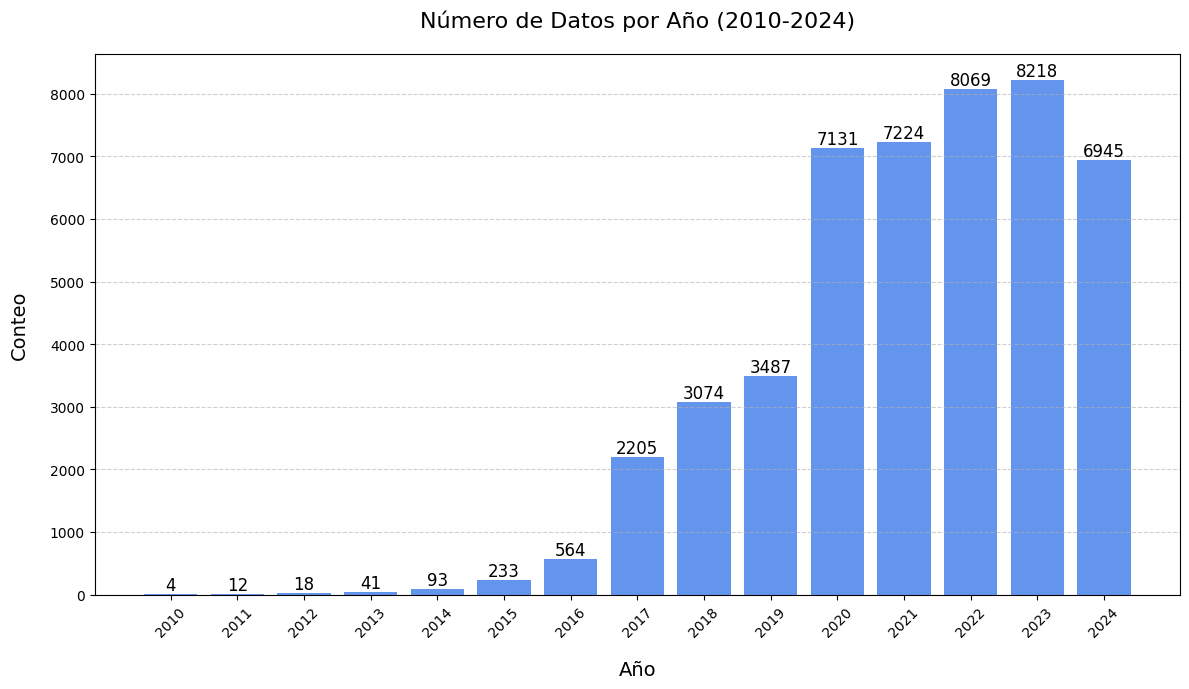

In [30]:
# Número de repositórios encontrados por año

contar_datos_por_agno(df, "created_at")

La progresión parece ser exponencial o superlineal, con saltos significativos entre 2016-2017 y 2019-2020

### 3.2. "Primeras exploraciones con la variable `topics`

In [31]:
df.topics.sample(3)

# Listas de cadenas

973      [code-snippets, data-science, datascience, hel...
26115    [ai, bayesian, data-science, forecasting, mach...
12381    [data-analysis, data-science, data-visualizati...
Name: topics, dtype: object

Generando la primera visualización de los temas más presentes en todo el DataFrame. Nota: El tema "data-science" siempre representará la totalidad de los datos, ya que fue el filtro utilizado en la adquisición a través de la API.

In [32]:
# Generando un diccionario que contenga el tópico como clave y su contador como valor, ordenado de manera descendente

sorted_value_counts = count_topics(df, "topics")
print(sorted_value_counts)

{'data-science': 47317, 'machine-learning': 19307, 'python': 18780, 'data-analysis': 8277, 'data-visualization': 7656, 'pandas': 5185, 'jupyter-notebook': 3689, 'deep-learning': 3612, 'python3': 3267, 'data': 2986, 'r': 2880, 'numpy': 2628, 'matplotlib': 2127, 'statistics': 1937, 'machine-learning-algorithms': 1854, 'artificial-intelligence': 1779, 'scikit-learn': 1712, 'sql': 1617, 'exploratory-data-analysis': 1505, 'seaborn': 1459, 'data-mining': 1421, 'classification': 1377, 'nlp': 1292, 'visualization': 1282, 'ai': 1175, 'data-analytics': 1108, 'eda': 1072, 'sklearn': 993, 'analytics': 981, 'random-forest': 976, 'tensorflow': 976, 'linear-regression': 975, 'kaggle': 966, 'database': 938, 'streamlit': 933, 'data-engineering': 916, 'logistic-regression': 915, 'natural-language-processing': 897, 'dataset': 886, 'regression': 876, 'neural-network': 872, 'ml': 804, 'machinelearning': 797, 'data-cleaning': 762, 'datascience': 750, 'computer-vision': 741, 'analysis': 732, 'clustering': 71

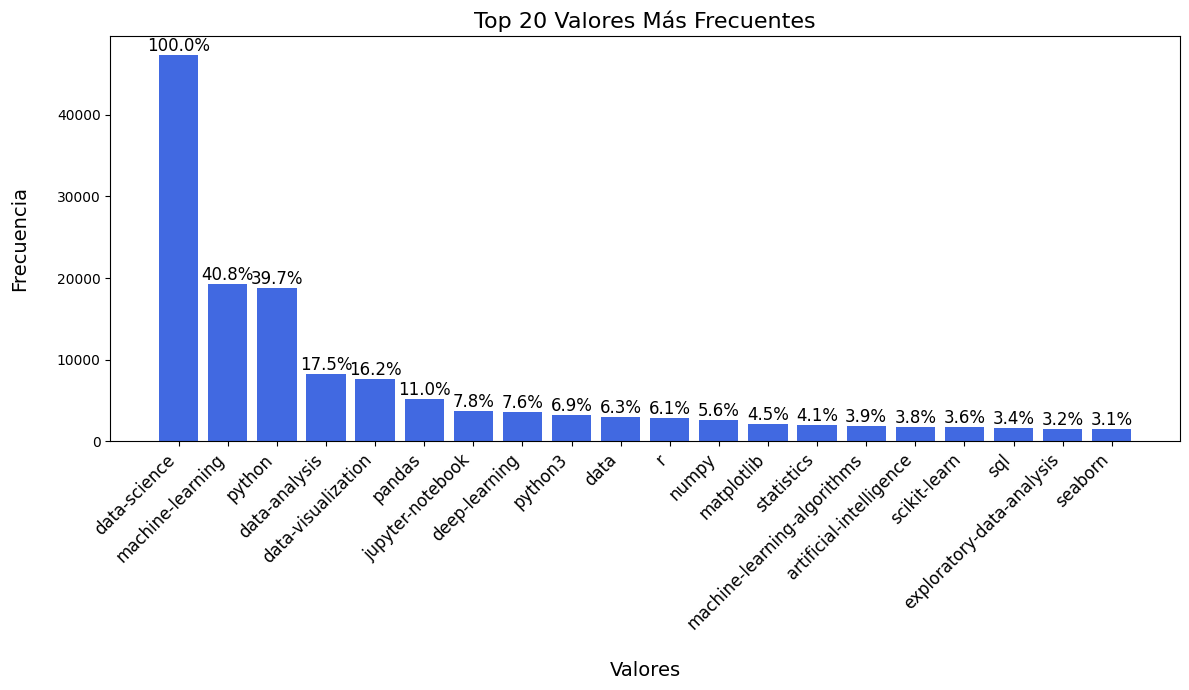

In [33]:
# Mostrando los 20 tópicos más utilizados en la historia

plot_top_20_numerical(df, sorted_value_counts)

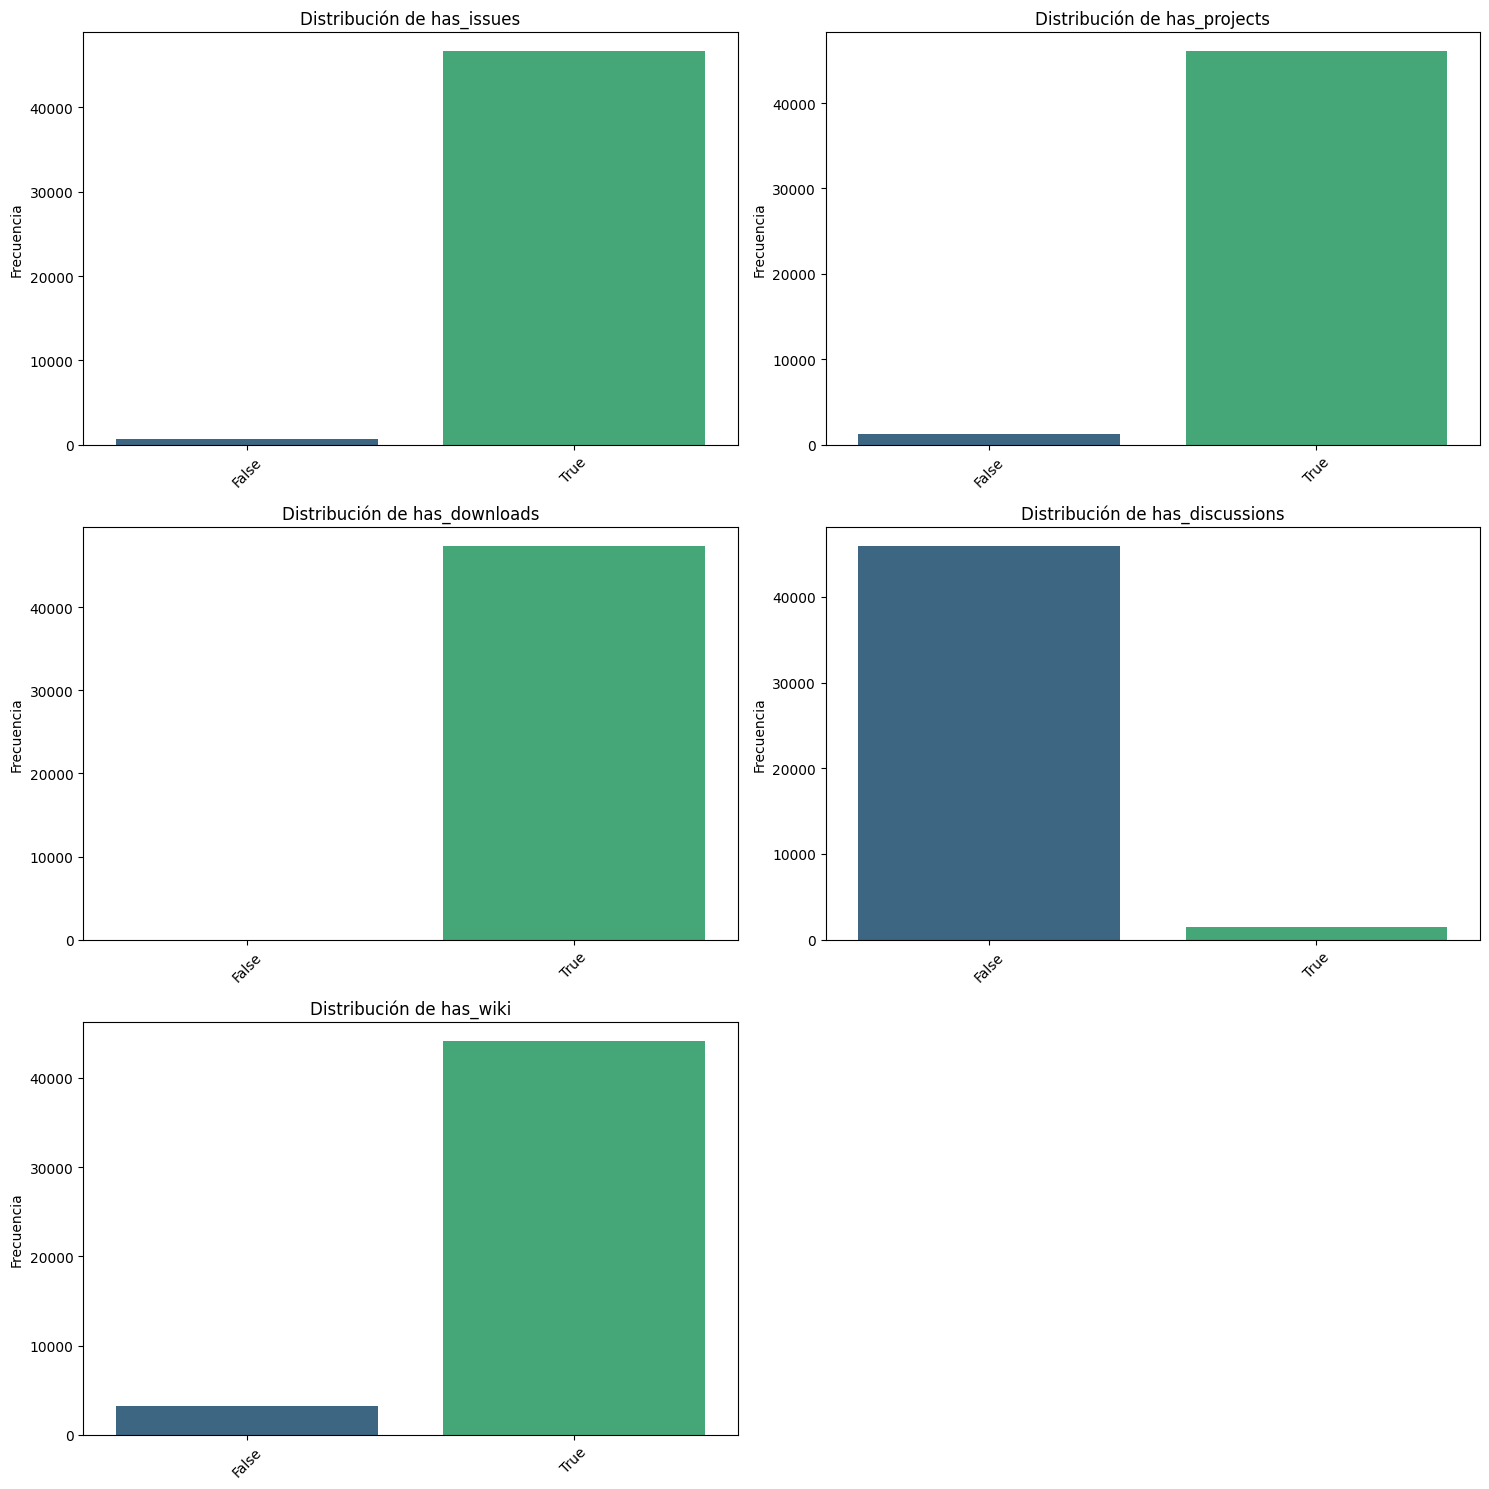

In [34]:
# Distribución de las columnas categóricas booleanas

cat_columns = ["has_issues", "has_projects", "has_downloads", "has_discussions", "has_wiki"]

pinta_distribucion_categoricas(df, cat_columns)

Valores encontrados en <topics> correspondientes a ['llm', 'llms', 'large-language']: {'llm-finetuning', 'llm-integration', 'llm-framework', 'llm-agent', 'llm-deployment', 'large-language-model', 'llmops-questions', 'llm-inference', 'llm', 'llmops-interview-questions', 'llms-langchain', 'llms-interview-questions', 'llmops-tech-interview', 'llm-for-time-series', 'llm-course', 'llmops', 'llm-training', 'llms-questions', 'llm-observability', 'groq-llm', 'visual-large-language-models', 'llms', 'multimodal-large-language-models', 'fine-tuning-llm', 'video-llms', 'llm-serving', 'large-language-models', 'llmstack', 'llms-tech-interview', 'llm-guardrails', 'llm-evaluation', 'open-source-llm', 'llm-recommendation'}
Valores encontrados en <llm_topics> correspondientes a llm: {'llm'}

Número de valores correspondientes a <['llm', 'llms', 'large-language']> en <topics>: 33
Número de valores correspondientes a <llm> en <llm_topics>: 1


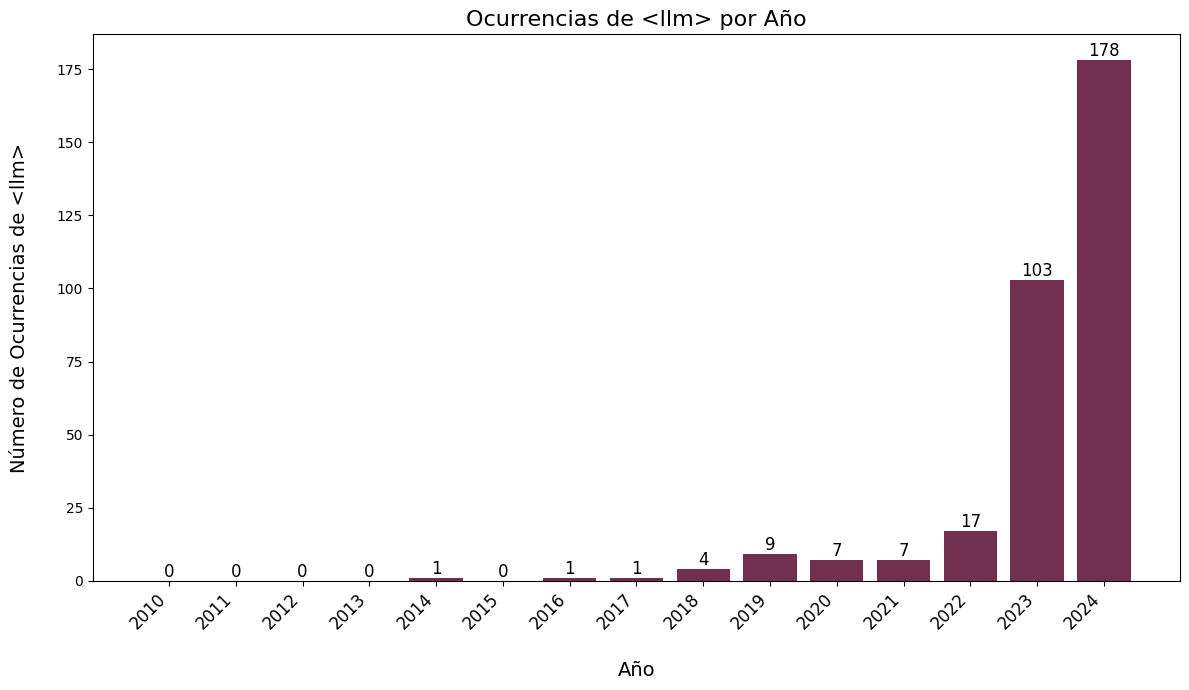

In [35]:
plot_replaced_string(df, "topics", ["llm", "llms", "large-language"], "llm")

Valores encontrados en <topics> correspondientes a ['-ai', 'ai-', 'artificial-intelligence']: {'data-science-and-ai-engineering', 'augmented-ai', 'ai-ml-python', 'boston-airbnb-data', 'seattle-airbnb', 'applied-ai', 'ai-platform', 'neuro-symbolic-ai', 'udacity-ai-nanodegree', 'medical-ai-project', 'midjourney-alternative-free-ai', 'explainable-ai-tech-interview', 'ai-ethics', 'udacity-artificial-intelligence', 'ai-models', 'computer-aided-drug-design', 'ai-assistant', 'azure-ai', 'artificial-intelligence-projects', 'ineuron-ai', 'neptune-ai', 'british-airways-virtual-program', 'ai-algorithms', 'music-ai', 'ai-chatbot', 'conversational-ai', 'ai-data-collection', 'claude-ai', 'ai-for-time-series', 'ai-engineer', 'indoor-air-quality', 'ai-solutions', 'ai-powered-consumer-segmentation', 'ai-in-finance', 'responsible-ai', 'explainable-ai-questions', 'open-ai-api', 'generative-ai-pharmacist', 'ai-algorithm', 'openshift-ai', 'connect4-ai-game', 'mycin-ai', 'explainable-ai', 'ai-canada', 'afri

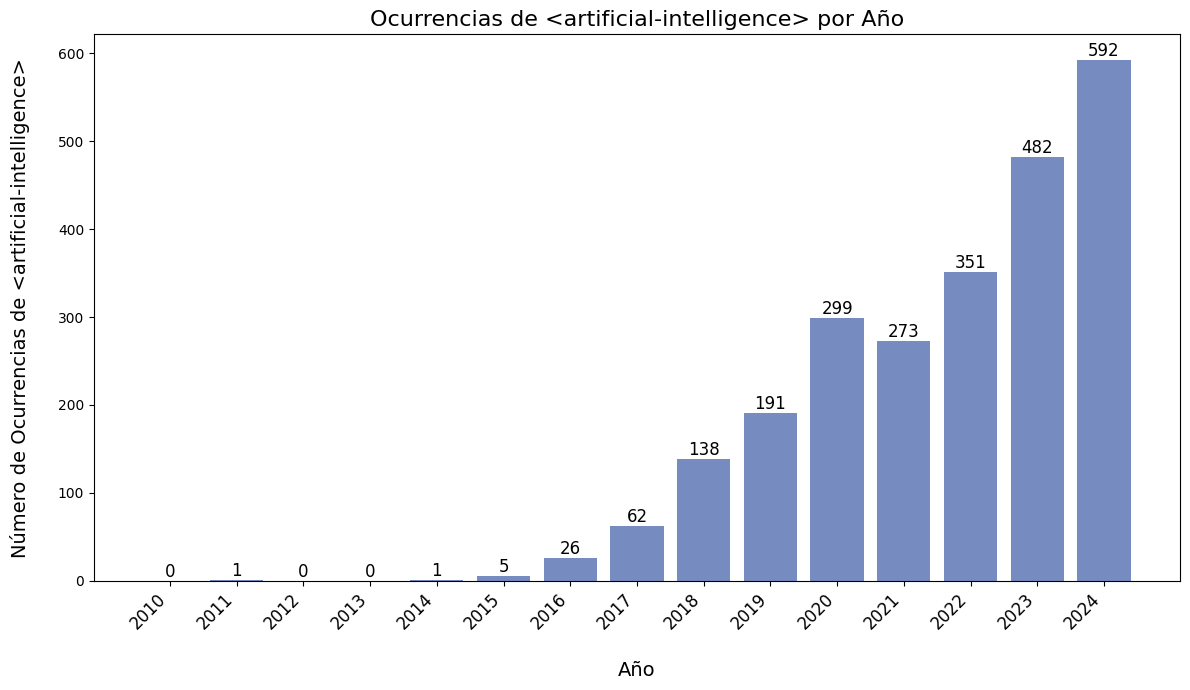

In [36]:
plot_replaced_string(df, "topics", ["-ai","ai-", "artificial-intelligence"], "artificial-intelligence")

Valores encontrados en <topics> correspondientes a ['generative']: {'generative', 'generative-modelling', 'generative-ai-model', 'generative-music', 'generative-ai-projects', 'generative-ai-tools', 'generative-model', 'generativeai', 'generative-ai', 'generative-ai-pharmacist', 'generative-models', 'generative-vs-discriminative-model', 'generative-adversarial-network', 'generative-art', 'generative-adversarial-networks'}
Valores encontrados en <generative-ai_topics> correspondientes a generative-ai: {'generative-ai'}

Número de valores correspondientes a <['generative']> en <topics>: 15
Número de valores correspondientes a <generative-ai> en <generative-ai_topics>: 1


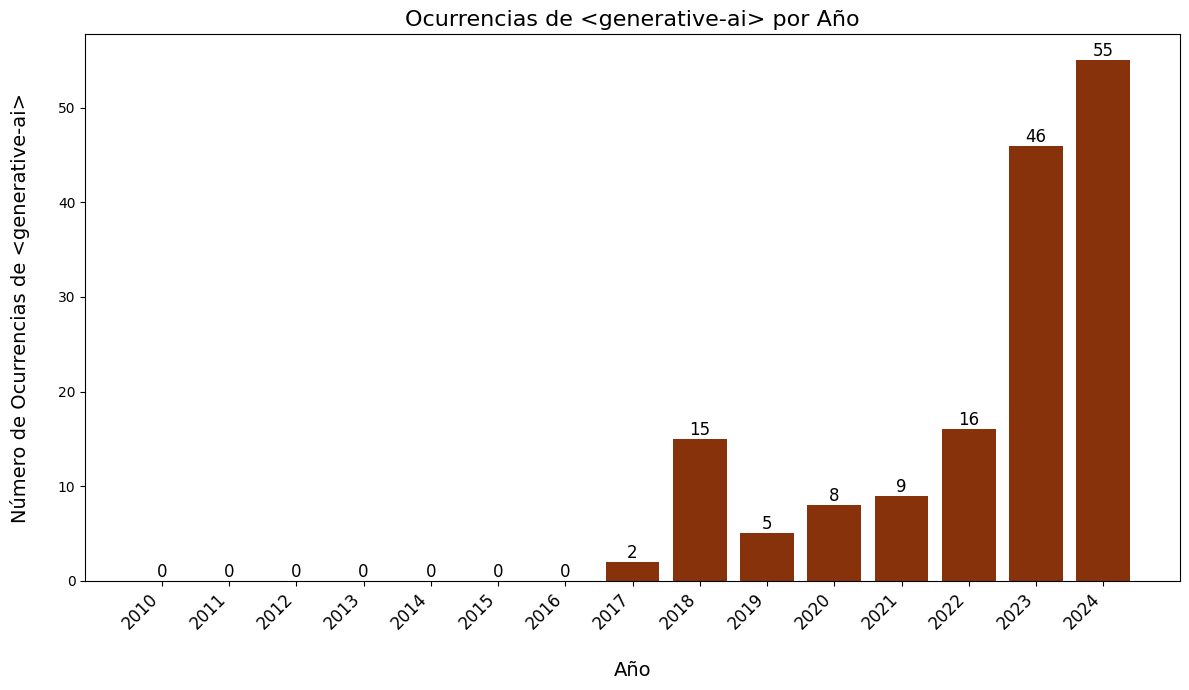

In [37]:
plot_replaced_string(df, "topics", "generative", "generative-ai")


Valores encontrados en <topics> correspondientes a ['big-data']: {'big-data-processing', 'big-data-platform', 'big-data', 'big-data-mart', 'big-data-cleaning', 'big-data-projects', 'bda-big-data-analytics', 'big-data-storage-and-processing', 'big-data-essentials', 'big-data-analysis', 'big-data-and-ml', 'big-data-competition', 'komputasi-big-data', 'big-data-visualization', 'api-access-to-big-dataa', 'big-data-hadoop', 'big-data-analytics'}
Valores encontrados en <big-data_topics> correspondientes a big-data: {'big-data'}

Número de valores correspondientes a <['big-data']> en <topics>: 17
Número de valores correspondientes a <big-data> en <big-data_topics>: 1


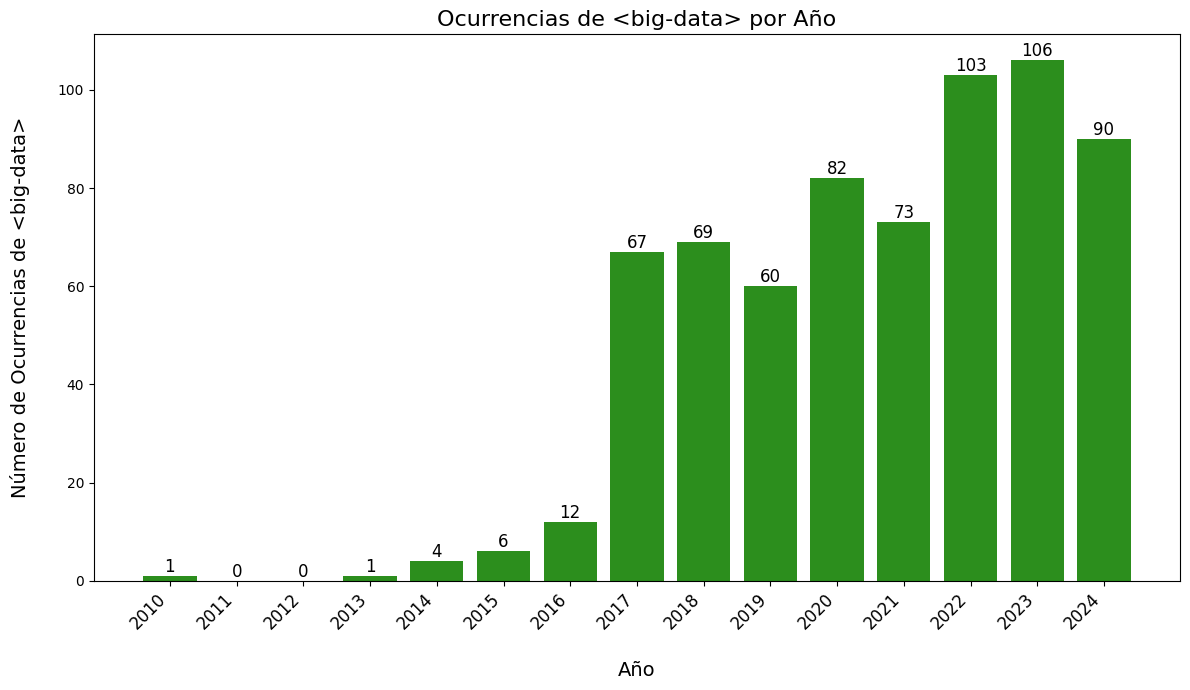

In [38]:
plot_replaced_string(df, "topics", "big-data", "big-data")

Valores encontrados en <topics> correspondientes a ['ops']: {'dataflow-ops', 'dev-ops', 'machine-learning-ops', 'data-ops', 'ml-ops'}
Valores encontrados en <ops_topics> correspondientes a ops: {'ops'}

Número de valores correspondientes a <['ops']> en <topics>: 5
Número de valores correspondientes a <ops> en <ops_topics>: 1


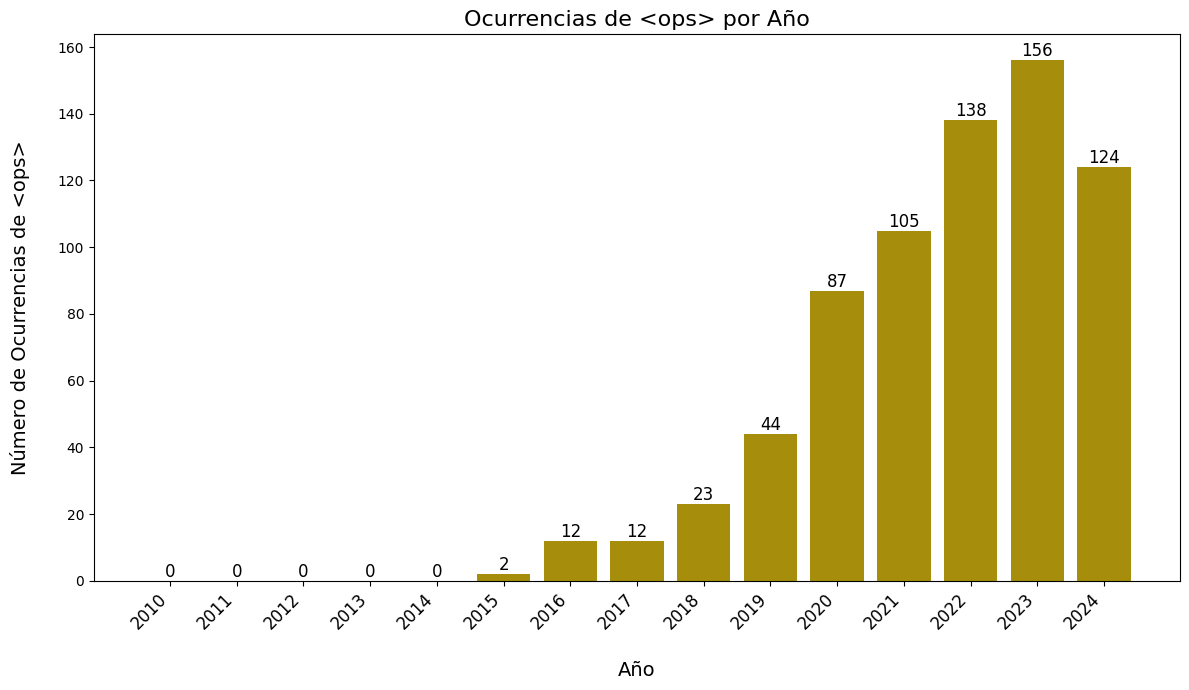

In [46]:
plot_replaced_string(df, "topics", "ops", "ops")

Valores encontrados en <topics> correspondientes a ['ml', 'machine-learning']: {'probabilistic-machine-learning', 'mlanguage', 'ai-ml-python', 'udacity-machine-learning', 'explainable-quantum-machine-learning', 'ml-deployment', 'udacity-machine-learning-nanodegree', 'core-machine-learning', 'practical-machine-learning', 'ml', 'mlrepa', 'mllib', 'ml-pipeline', 'mlops-interview-questions', 'explainable-ml', 'supervised-machine-learning', 'mle', 'ml-ppc', 'ml4h', 'machine-learning-internship', 'intro-to-ml', 'udemy-machine-learning', 'mlops', 'machine-learning-template', 'mlsys', 'machine-learning-with-code', 'email-spam-detection-with-machine-learning', 'movielens-machine-learning', 'mli', 'ml-with-khom', 'ml0101en', 'mlmodeldeployments', 'mlflow-tracking', 'iris-flowers-classification-ml-project', 'scikitlearn-machine-learning', 'mlflow-docker', 'mlops-environment', 'interpretable-ml', 'ibm-machine-learning', 'machine-learning-framework', 'machine-learning-security', 'mlcourse', 'ml-api

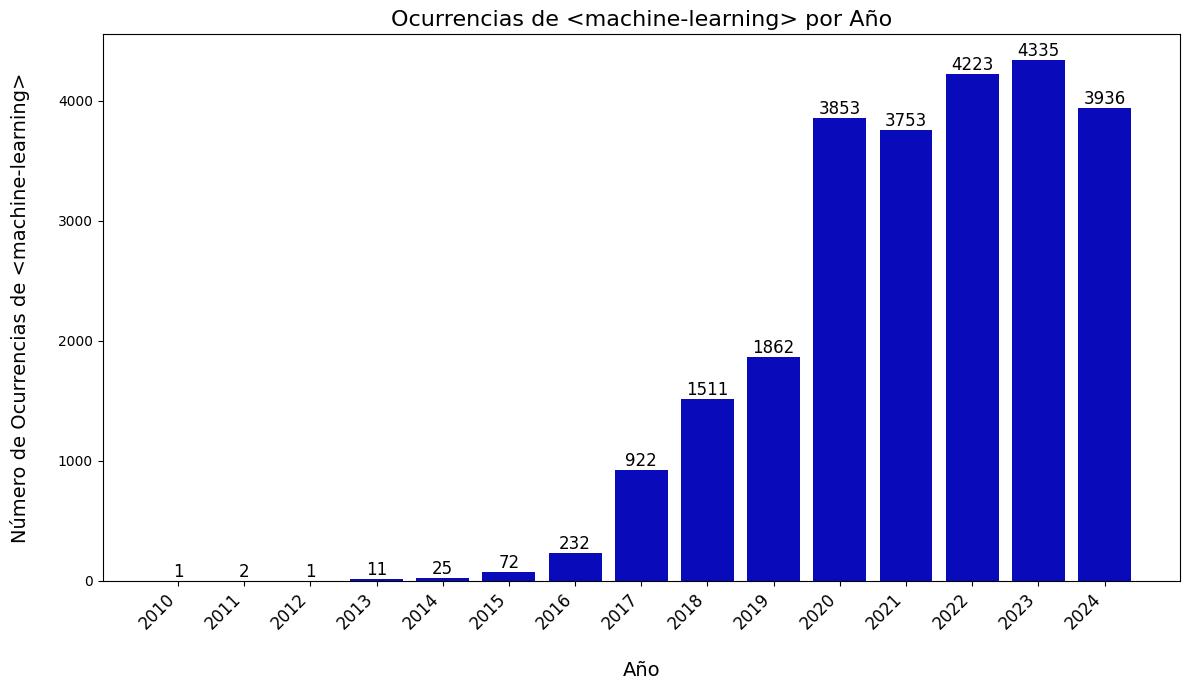

In [47]:
plot_replaced_string(df, "topics", ["ml", "machine-learning"], "machine-learning")

Valores encontrados en <topics> correspondientes a ['dl', 'deep-learning']: {'dlang', 'dltk', 'deep-learning-tutorial', 'deep-learning-ai', 'deep-learning-tech-interview', 'pytorch-deep-learning', 'tensorflow-deep-learning', 'deep-learning-engineer', 'deep-learning-reading-group', 'dlookr', 'dlib-face-recognition', 'deep-learning-practice', 'udacity-deep-learning-nanodegree', 'deep-learning-algorithm', 'deep-learning-r', 'interpretable-deep-learning', 'deep-learning-pytorch', 'nlp-deep-learning', 'deep-learning-api', 'youtube-dl', 'yolov9-deep-learning', 'dl', 'dlib-face-detection', 'deep-learning-projects', 'deep-learning-python', 'efficient-deep-learning', 'bayesian-deep-learning', 'deep-learning-networks', 'deep-learning-models', 'dlschl-homework', 'dive-into-deep-learning', 'gluonts-deep-learning', 'dlschl', 'dlnd', 'deep-learning-matlab', 'dlt', 'deep-learning-papers', 'dlib', 'deep-learning-notebooks', 'deep-learning-project', 'deep-learning-interview-questions', 'geometric-deep-

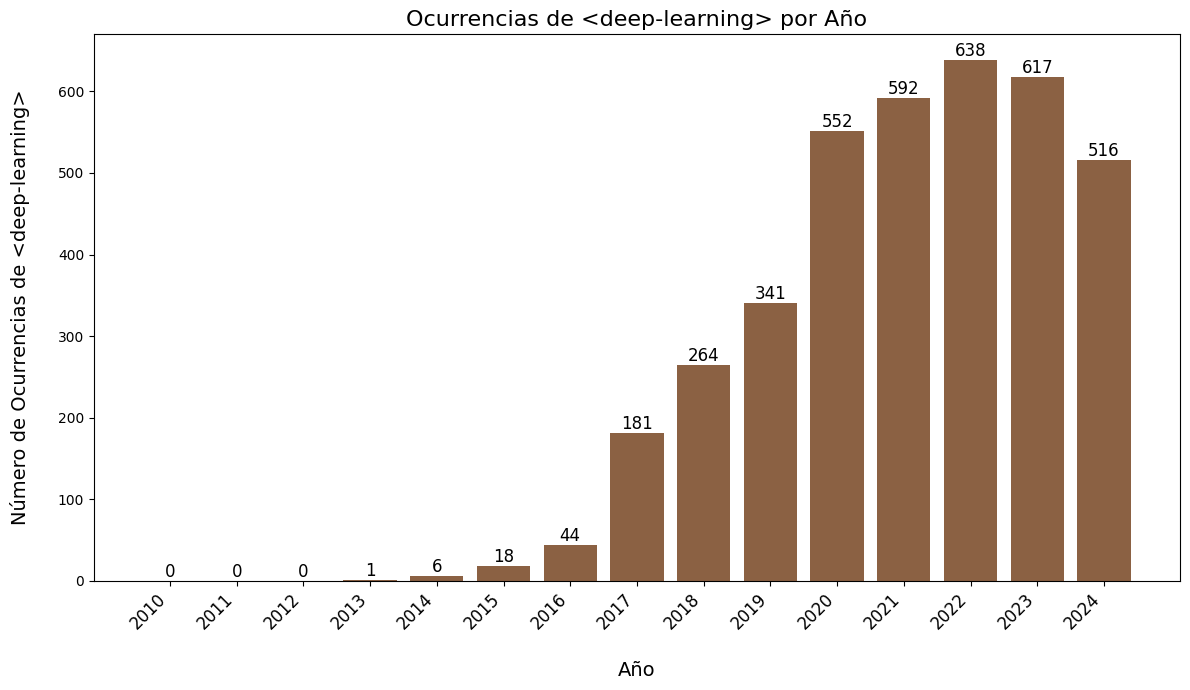

In [48]:
plot_replaced_string(df, "topics", ["dl", "deep-learning"], "deep-learning")

3.3. Completar Languages

In [39]:
df_language.language.value_counts().head(5)

language
Jupyter Notebook    25961
Python               8438
HTML                 2792
R                    1900
JavaScript            705
Name: count, dtype: int64

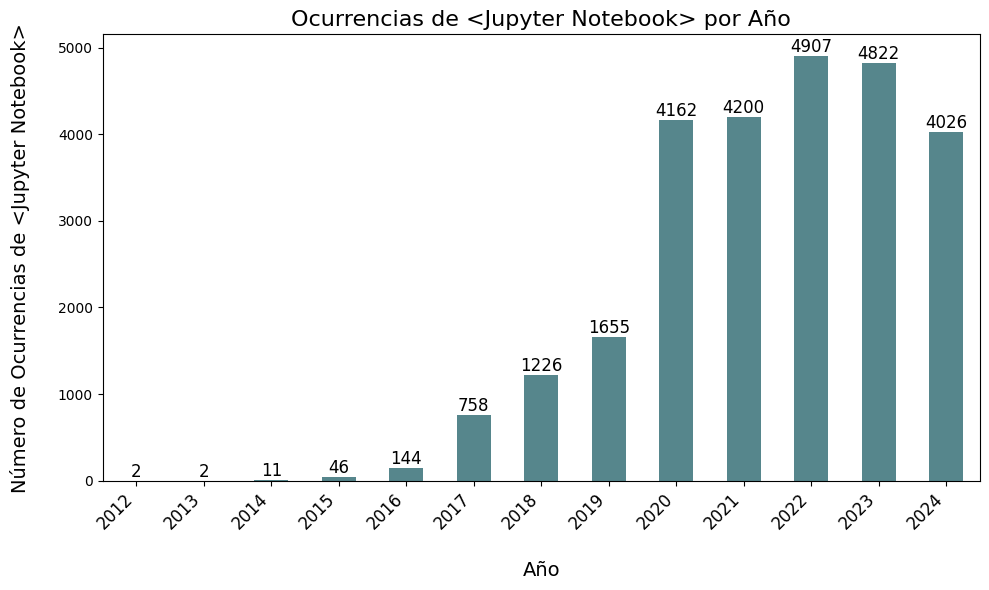

In [41]:
plot_occurrences_by_year(df_language, "language", "Jupyter Notebook")

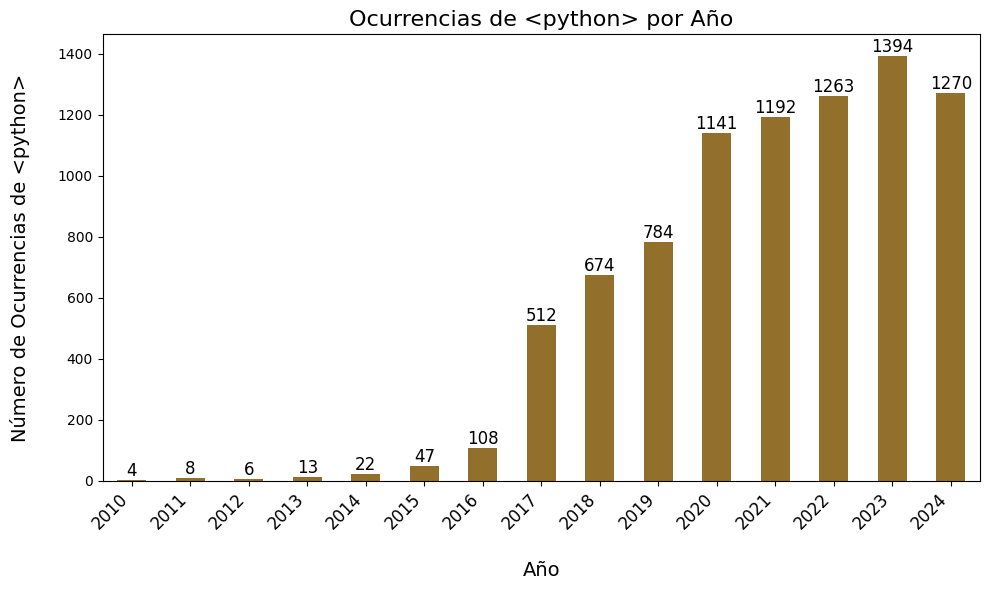

In [40]:
plot_occurrences_by_year(df_language, "language", "python")

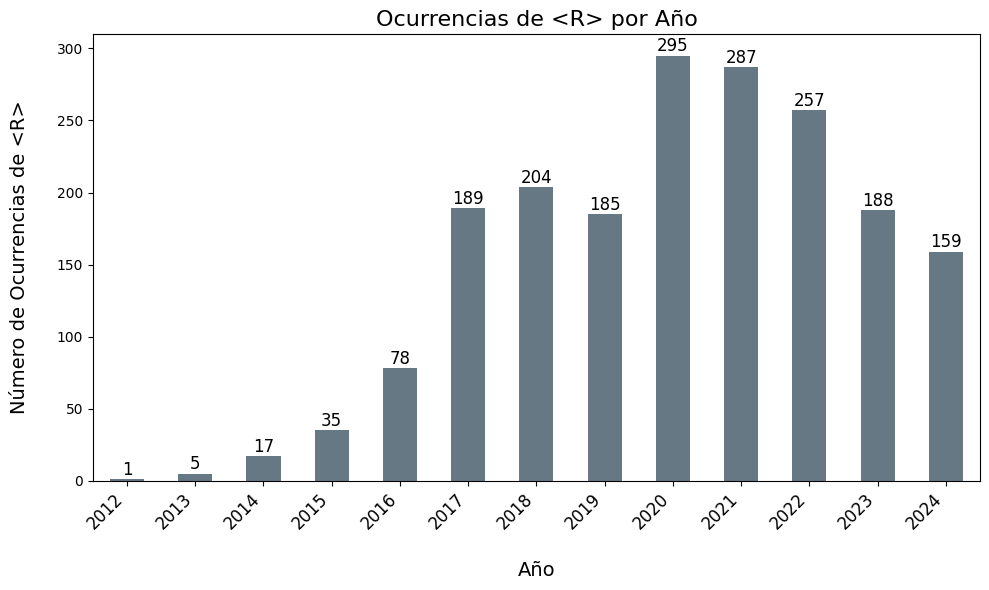

In [44]:
plot_occurrences_by_year(df_language, "language", "R")

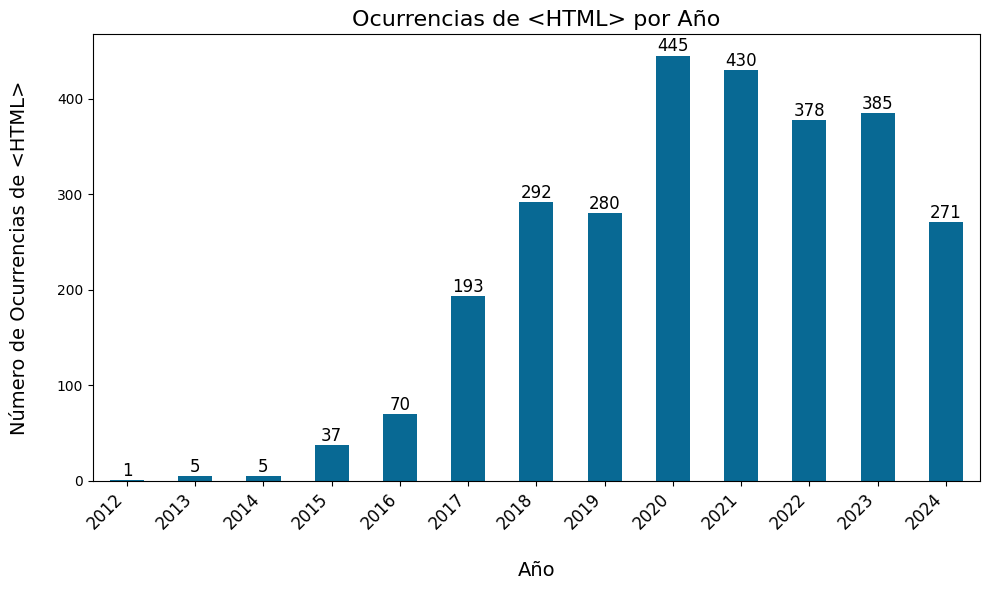

In [42]:
plot_occurrences_by_year(df_language, "language", "HTML")

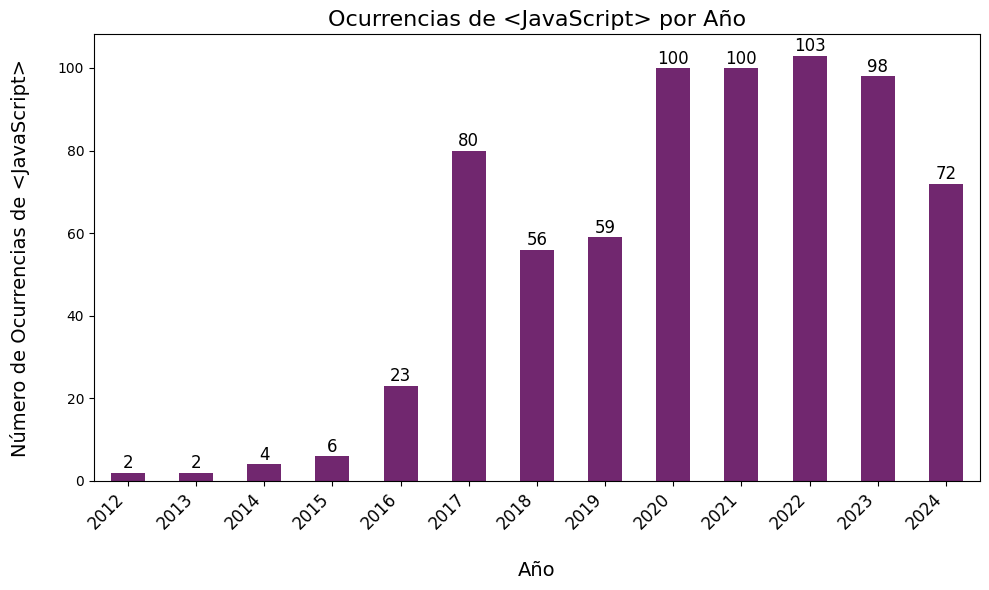

In [43]:
plot_occurrences_by_year(df_language, "language", "JavaScript")

In [86]:
def filter_by_string(df, column_name, search_string):
    pattern = re.escape(search_string)  
    filtered_values = df[df[column_name].str.contains(pattern, case=False, regex=True)][column_name]
    return filtered_values.tolist() 


filtered_values = filter_by_string(df, "name", "genomic")
filtered_values

['getting-started-with-genomics-tools-and-resources',
 'GenomicDataCommons',
 'Genomic-Cancer-Data-Analysis',
 'Genomics',
 'MachineLearning4Genomics',
 'r-learning-resources-for-genomics',
 'Brain-Tumor-Radiogenomic-Classification',
 'genomic-data-science-project-about-fetus-and-adult',
 'Genomic_Sequence_Analysis',
 'genomics-in-azure-code',
 'Genomic-Data-Science-JHU',
 'genomicsdatascience',
 'Genomic_Data_Science',
 'metagenomics-data-analysis',
 'Genomic-Data-Clustering',
 'Bioconductor-for-Genomic-Data-Science',
 'Statistics-for-Genomic-Data-Science',
 'Genomic_projects',
 'genomics_and_GWAS_tutorials',
 'GenomicDiseasePrediction']

ARRUMAR FUNÇÃO ABAIXO

In [ ]:
def plot_filtered_occurrences_by_year(df, filtered_values, year_column):
    df_filtered = df[df['name'].isin(filtered_values)]
    
    year_counts = df_filtered.groupby(year_column).size()

    return year_counts

year_counts = plot_filtered_occurrences_by_year(df, filtered_values, "year")

print(year_counts)

plt.figure(figsize=(10, 6))
ax = year_counts.plot(kind='bar', color='royalblue')

plt.title('Número de Ocorrências de "medicine" por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14, labelpad=20)
plt.ylabel('Número de Ocorrências', fontsize=14, labelpad=20)

for year, count in year_counts.items():
    ax.text(year, count + 0.2, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()

plt.show()


year
2015    1
2016    1
2018    1
2020    1
2021    7
2022    3
2023    4
2024    2
dtype: int64


<ipython-input-87-ad0cb1edc836>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 196214x607 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [66]:
df.year

0        2010
1        2010
2        2010
3        2010
4        2011
         ... 
48769    2024
48770    2024
48771    2024
48772    2024
48773    2024
Name: year, Length: 47318, dtype: int32